
**Introducción al Aprendizaje Automatico - Lab. 2**

**Grupo 3**



# Laboratorio 2: Armado de un esquema de aprendizaje automático

En el laboratorio final se espera que puedan poner en práctica los conocimientos adquiridos en el curso, trabajando con un conjunto de datos de clasificación.

El objetivo es que se introduzcan en el desarrollo de un esquema para hacer tareas de aprendizaje automático: selección de un modelo, ajuste de hiperparámetros y evaluación.

El conjunto de datos a utilizar está en `./data/loan_data.csv`. Si abren el archivo verán que al principio (las líneas que empiezan con `#`) describen el conjunto de datos y sus atributos (incluyendo el atributo de etiqueta o clase).

Se espera que hagan uso de las herramientas vistas en el curso. Se espera que hagan uso especialmente de las herramientas brindadas por `scikit-learn`.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

## Carga de datos y división en entrenamiento y evaluación

La celda siguiente se encarga de la carga de datos (haciendo uso de pandas). Estos serán los que se trabajarán en el resto del laboratorio.

In [2]:
url1="https://raw.githubusercontent.com/DiploDatos/IntroduccionAprendizajeAutomatico/master/data/loan_data.csv"
dataset = pd.read_csv(url1,comment="#")

In [3]:
# Visualizamos el dataset
dataset

,TARGET,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,0,4700,88026.0,115506.0,6.0,0.0,0.0,182.248332,0.0,27.0,29.209023
1,0,19300,39926.0,101208.0,4.0,0.0,0.0,140.051638,0.0,14.0,31.545694
2,0,5700,71556.0,79538.0,2.0,0.0,0.0,92.643085,0.0,15.0,41.210012
3,0,13000,44875.0,57713.0,0.0,1.0,0.0,184.990324,1.0,12.0,28.602076
4,0,19300,72752.0,106084.0,11.0,0.0,0.0,193.707100,1.0,13.0,30.686106
...,...,...,...,...,...,...,...,...,...,...,...
1849,1,53400,228236.0,305514.0,6.0,0.0,0.0,11.148069,0.0,2.0,34.558417
1850,1,53600,235895.0,299772.0,5.0,0.0,0.0,112.748282,7.0,22.0,44.945929
1851,1,53600,208197.0,297280.0,4.0,1.0,1.0,160.485251,2.0,29.0,41.646731
1852,1,65500,205156.0,290239.0,2.0,0.0,0.0,98.808206,1.0,21.0,144.189001


In [4]:
# División entre instancias y etiquetas
X, y = dataset.iloc[:, 1:], dataset.TARGET

# división entre entrenamiento y evaluación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


Documentación:

- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

## Ejercicio 1: Descripción de los Datos y la Tarea

Responder las siguientes preguntas:

**1. ¿De qué se trata el conjunto de datos?**
  
   Es un conjunto de datos del departamento de créditos de un banco. Con informacion sobre las hipotecas y el estado de las mismas de cada uno de los clientes.

**2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?**

  La variable objetivo es la variable binaria 'TARGET'. En la misma se muestra si el cliente cumplio o incumplio el pago y tiene la siguiente salida:

  - 1 si el cliente incumplió el pago del prestamo

  - 0 si el cliente cumplió el pago del prestamo

En base a la informacion de esta variable el banco va a determinar si puede entregar un nuevo credito al cliente o no.

**3. ¿Qué información (atributos) hay disponible para hacer la predicción?**

Los atributos presentes en el dataset son:

  TARGET - variable binaria definida en el punto anterior.

  LOAN - importe del prestamo.

  MORTDUE - monto pendiente de pagar de la hipoteca.

  VALUE - valor actual de la propiedad.

  YOJ - años de actividad en el trabajo actual.

  DEROG - número de reportes derogatorios importante. Esto hace referencia a la cantidad de 'marcas' negativas dentro de un informe crediticio que pueden dañar el puntaje e impactar en la capacidad para acceder a distintos tipos de créditos.

  DELINQ - creditos totales con demora en el pago.

  CLAGE - Antigüedad de la línea de credito más antigua en meses

  NINQ - Número de líneas de crédito recientes

  CLNO - Número de líneas de crédito

  DEBTINC - Relación o ratio deuda-ingresos

**4. ¿Qué atributos imagina ud. que son los más determinantes para la predicción?**


Text(0.5, 1.0, 'Correlation between Variables')

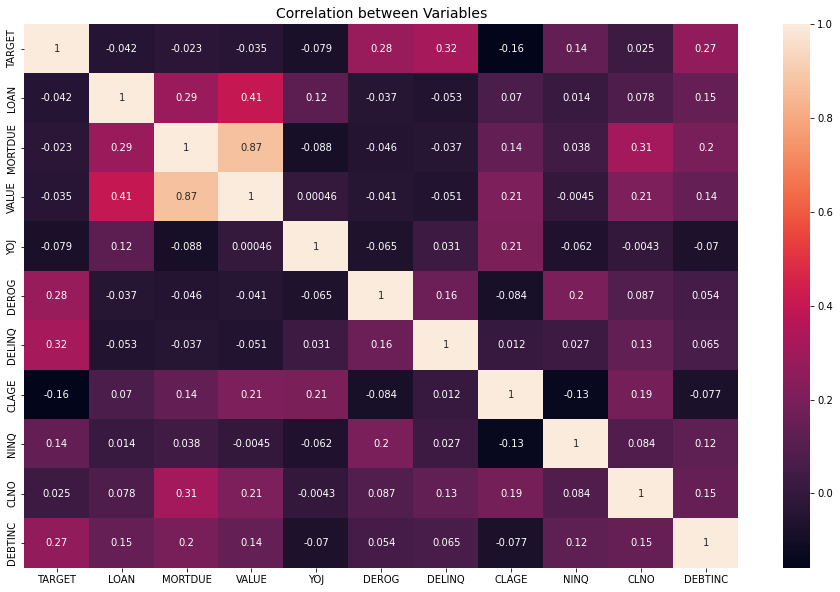

In [5]:
# Creamos la Matriz de Correlacion para determinar las relaciones entre atributos.
plt.figure(figsize=(16,10))
sns.heatmap(dataset[dataset.columns].corr(),annot=True, fmt='.2g')
plt.title('Correlation between Variables', fontsize=14)

En base a la información anterior estimamos que las variable más siginificativas son las siguientes.

- DEROG - número de reportes derogatorios importante. Esto hace referencia a la cantidad de 'marcas' negativas dentro de un informe crediticio que pueden dañar el puntaje e impactar en la capacidad para acceder a distintos tipos de créditos.
- DELINQ - número de líneas de crédito morosas
- CLAGE - Antigüedad de la línea comercial más antigua en meses
- NINQ - Número de líneas de crédito recientes
- DEBTINC - Relación deuda-ingresos

In [6]:
# Se escalan los datos que se utilizan para predecir
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
X_train = s.fit_transform(X_train)
X_test = s.fit_transform(X_test)

## Ejercicio 2: Predicción con Modelos Lineales

En este ejercicio se entrenarán modelos lineales de clasificación para predecir la variable objetivo.

Para ello, deberán utilizar la clase SGDClassifier de scikit-learn.

Documentación:
- https://scikit-learn.org/stable/modules/sgd.html
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html


### Ejercicio 2.1: SGDClassifier con hiperparámetros por defecto

Entrenar y evaluar el clasificador SGDClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente **fijar la semilla aleatoria** para hacer repetible el experimento.

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

In [7]:
from sklearn.linear_model import SGDClassifier
model1 = SGDClassifier(random_state=99) #Fijamos la semilla en 99 para que sea repoducible de forma general
model1.fit(X_train, y_train)

SGDClassifier(random_state=99)

In [8]:
#model accuracy score
score = model1.score(X_train, y_train)
print("Training score: ", score) # El modelo predice correctamente en un 87% sobre el conjunto de entrenamiento.

Training score:  0.8725556304787593


Evaluación de la predicción sobre el conjunto de entrenamiento



In [9]:
ypred = model1.predict(X_train)

In [10]:
from sklearn.metrics import classification_report
print(classification_report(y_train, ypred))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93      1232
           1       0.83      0.31      0.45       251

    accuracy                           0.87      1483
   macro avg       0.85      0.65      0.69      1483
weighted avg       0.87      0.87      0.85      1483



In [11]:
from sklearn.metrics import confusion_matrix
cm_train = confusion_matrix(y_train, ypred)
print(cm_train)

[[1216   16]
 [ 173   78]]


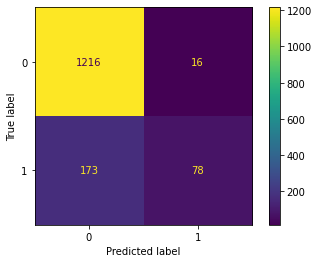

In [12]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(cm_train) #Es una variable binaria 
disp.plot()
plt.grid(False)
plt.show()

Evaluación de predicción sobre el conjunto de testeo

In [13]:
ypredtest = model1.predict(X_test)

In [14]:
print(classification_report(y_test, ypredtest))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       313
           1       0.76      0.28      0.41        58

    accuracy                           0.87       371
   macro avg       0.82      0.63      0.67       371
weighted avg       0.86      0.87      0.85       371



In [15]:
#Matriz de Confusion
from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_test, ypredtest)
print(cm_test) 

[[308   5]
 [ 42  16]]


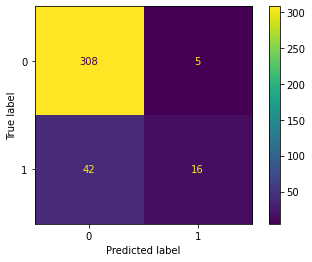

In [16]:
from sklearn.metrics import ConfusionMatrixDisplay
dis = ConfusionMatrixDisplay(cm_test)
dis.plot()
plt.grid(False)
plt.show()

El objetivo del modelo es predecir si el banco puede entregarle a un determinado cliente un nuevo crédito o no, en base a ciertas características (variables) que provee el dataset. La variable target asume los valores 0 si el cliente cumplió con el pago del préstamos y 1 si incumplió, las metricas comparan los resultados predichos por el modelo con los verdaderos resultados, que son los que provee la variable TARGET. Por lo tanto las métricas nos dan un indicio sobre el desempeño del modelo. 

En este caso el modelo acierta el 87% de las veces sobre el conjunto de testeo, en cuando la precision, de todos los valores que predijo como 1 el 76% de ellos fueron correctos y de todos los valores reales (todos los 1 de la variable TARGET) el 27% de ellos fueron correctamente predichos por el modelo. La precisión de la predicción mejora a un 88% y 98% para el valor 0. La F1 es una combinación de las dos medidas anteriores y va a ser utilizada para comparar con el resto de los modelos. 

Por último tenemos la matriz de confusión, cuya forma óptima es cuando es una matriz diagonal, en este caso el modelo predijo muchos valores 0 que verdaderamente eran 1 y por eso no se acerca a una matriz diagonal. 

Es válido notar que los resultados que se obtienen sobre el desempeño del modelo sobre conjunto de entrenamiento es mejo, esto es un resultado que se da generalmente dado que aprende de estos datos dando menores errores de predicción. 

### Ejercicio 2.2: Ajuste de Hiperparámetros

Seleccionar valores para los hiperparámetros principales del SGDClassifier. Como mínimo, probar diferentes funciones de loss, tasas de entrenamiento y tasas de regularización.

Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

Reportar accuracy promedio y varianza para todas las configuraciones.

Para la mejor configuración encontrada, evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

Documentación:
- https://scikit-learn.org/stable/modules/grid_search.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [17]:
model = SGDClassifier(random_state=99)

In [18]:
model.max_iter = 3000 #Establecemos un máximo de iteraciones
model.eta0 = 0.01 #Para que el modelo converga es necesario establecer este parámetro mayor a cero
model.loss_functions #Vemos cuáles son las distintas opciones de funciones de pérdida que tiene le SDGClassifier

{'epsilon_insensitive': (sklearn.linear_model._sgd_fast.EpsilonInsensitive,
  0.1),
 'hinge': (sklearn.linear_model._sgd_fast.Hinge, 1.0),
 'huber': (sklearn.linear_model._sgd_fast.Huber, 0.1),
 'log': (sklearn.linear_model._sgd_fast.Log,),
 'modified_huber': (sklearn.linear_model._sgd_fast.ModifiedHuber,),
 'perceptron': (sklearn.linear_model._sgd_fast.Hinge, 0.0),
 'squared_epsilon_insensitive': (sklearn.linear_model._sgd_fast.SquaredEpsilonInsensitive,
  0.1),
 'squared_error': (sklearn.linear_model._sgd_fast.SquaredLoss,),
 'squared_hinge': (sklearn.linear_model._sgd_fast.SquaredHinge, 1.0),
 'squared_loss': (sklearn.linear_model._sgd_fast.SquaredLoss,)}

In [19]:
model.get_params() #Vemos cuáles son los distintos parámetros del modelo

{'alpha': 0.0001,
 'average': False,
 'class_weight': None,
 'early_stopping': False,
 'epsilon': 0.1,
 'eta0': 0.01,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'optimal',
 'loss': 'hinge',
 'max_iter': 3000,
 'n_iter_no_change': 5,
 'n_jobs': None,
 'penalty': 'l2',
 'power_t': 0.5,
 'random_state': 99,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [20]:
#Establecemos valores a los parámetros de nuestro interés 
param_grid = {
    'loss': ['hinge', 'log', 'squared_error', 'squared_hinge'],
    'learning_rate':['constant', 'optimal'],
    'alpha':[0.001, 0.0001, 0.00001, 1.0, 10.0],
    'penalty':['l2', 'l1', 'elasticnet']
    }

In [21]:
#Podemos listar todas las combinaciones para usarlas con ParameterGrid
from sklearn.model_selection import ParameterGrid
for params in ParameterGrid(param_grid):
    print(params)

{'alpha': 0.001, 'learning_rate': 'constant', 'loss': 'hinge', 'penalty': 'l2'}
{'alpha': 0.001, 'learning_rate': 'constant', 'loss': 'hinge', 'penalty': 'l1'}
{'alpha': 0.001, 'learning_rate': 'constant', 'loss': 'hinge', 'penalty': 'elasticnet'}
{'alpha': 0.001, 'learning_rate': 'constant', 'loss': 'log', 'penalty': 'l2'}
{'alpha': 0.001, 'learning_rate': 'constant', 'loss': 'log', 'penalty': 'l1'}
{'alpha': 0.001, 'learning_rate': 'constant', 'loss': 'log', 'penalty': 'elasticnet'}
{'alpha': 0.001, 'learning_rate': 'constant', 'loss': 'squared_error', 'penalty': 'l2'}
{'alpha': 0.001, 'learning_rate': 'constant', 'loss': 'squared_error', 'penalty': 'l1'}
{'alpha': 0.001, 'learning_rate': 'constant', 'loss': 'squared_error', 'penalty': 'elasticnet'}
{'alpha': 0.001, 'learning_rate': 'constant', 'loss': 'squared_hinge', 'penalty': 'l2'}
{'alpha': 0.001, 'learning_rate': 'constant', 'loss': 'squared_hinge', 'penalty': 'l1'}
{'alpha': 0.001, 'learning_rate': 'constant', 'loss': 'squared

* Utilizamos el método **GridSearchCV** que usa la técnica de Cross Validation para obtener los mejores hiperparametros del algoritmo.

In [22]:
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(model, param_grid, scoring='accuracy') #Por default utiliza 5-fold cross-validation
cv.fit(X_train, y_train)

GridSearchCV(estimator=SGDClassifier(eta0=0.01, max_iter=3000, random_state=99),
             param_grid={'alpha': [0.001, 0.0001, 1e-05, 1.0, 10.0],
                         'learning_rate': ['constant', 'optimal'],
                         'loss': ['hinge', 'log', 'squared_error',
                                  'squared_hinge'],
                         'penalty': ['l2', 'l1', 'elasticnet']},
             scoring='accuracy')

In [23]:
results = cv.cv_results_ #Resultados del modelo

params = results['params']
mean = results['mean_test_score']
std = results['std_test_score']
rank = results['rank_test_score']

df = pd.DataFrame(results) #Disponemos los resultados obtenidos en un dataframe para una mejo visualización
df[['mean_test_score', 'std_test_score','rank_test_score', 'param_alpha', 'param_learning_rate','param_loss', 'param_penalty']]

,mean_test_score,std_test_score,rank_test_score,param_alpha,param_learning_rate,param_loss,param_penalty
0,0.869192,0.010447,6,0.001,constant,hinge,l2
1,0.868521,0.010535,11,0.001,constant,hinge,l1
2,0.871212,0.009089,3,0.001,constant,hinge,elasticnet
3,0.865818,0.014654,18,0.001,constant,log,l2
4,0.867843,0.012809,14,0.001,constant,log,l1
...,...,...,...,...,...,...,...
115,0.830749,0.001259,73,10.0,optimal,squared_error,l1
116,0.830749,0.001259,73,10.0,optimal,squared_error,elasticnet
117,0.833447,0.003979,69,10.0,optimal,squared_hinge,l2
118,0.830749,0.001259,73,10.0,optimal,squared_hinge,l1


In [24]:
#Obtenemos el mejor modelo de todos los que busco el GridSearch
best_model = cv.best_estimator_ 

In [25]:
#Parámetros del mejor modelo
cv.best_params_

{'alpha': 0.001, 'learning_rate': 'optimal', 'loss': 'log', 'penalty': 'l2'}

* Calculamos las métricas para el mejor modelo tanto sobre el conjunto de entrenamiento como el de testeo

In [26]:
ypred_train = best_model.predict(X_train)

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_train, ypred_train))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93      1232
           1       0.81      0.31      0.45       251

    accuracy                           0.87      1483
   macro avg       0.85      0.65      0.69      1483
weighted avg       0.87      0.87      0.85      1483



In [28]:
ypred_test = best_model.predict(X_test)

In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test, ypred_test))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       313
           1       0.76      0.33      0.46        58

    accuracy                           0.88       371
   macro avg       0.82      0.65      0.69       371
weighted avg       0.87      0.88      0.86       371



Realizando una comparación entre los resultados obtenidos en ambos modelos vemos que sobre el conjunto de entrenamiento la diferencia es muy sensible, mientras que sobre el conjunto de testeo es notoria la mejora del desempeño del modelo sobre todo para predecir la categoría 1, por ende podemos concluir que efectivamente encontró el mejor modelo dado que se busca que este pueda clasificar bien los casos desconocidos y con los que no fue entrenado el modelo. 

## Ejercicio 3: Árboles de Decisión

En este ejercicio se entrenarán árboles de decisión para predecir la variable objetivo.

Para ello, deberán utilizar la clase DecisionTreeClassifier de scikit-learn.

Documentación:
- https://scikit-learn.org/stable/modules/tree.html
  - https://scikit-learn.org/stable/modules/tree.html#tips-on-practical-use
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
- https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html

### Ejercicio 3.1: DecisionTreeClassifier con hiperparámetros por defecto

Entrenar y evaluar el clasificador DecisionTreeClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente **fijar la semilla aleatoria** para hacer repetible el experimento.

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión


In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [31]:
clf = DecisionTreeClassifier(max_depth=2, criterion='entropy', random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=0)

In [32]:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

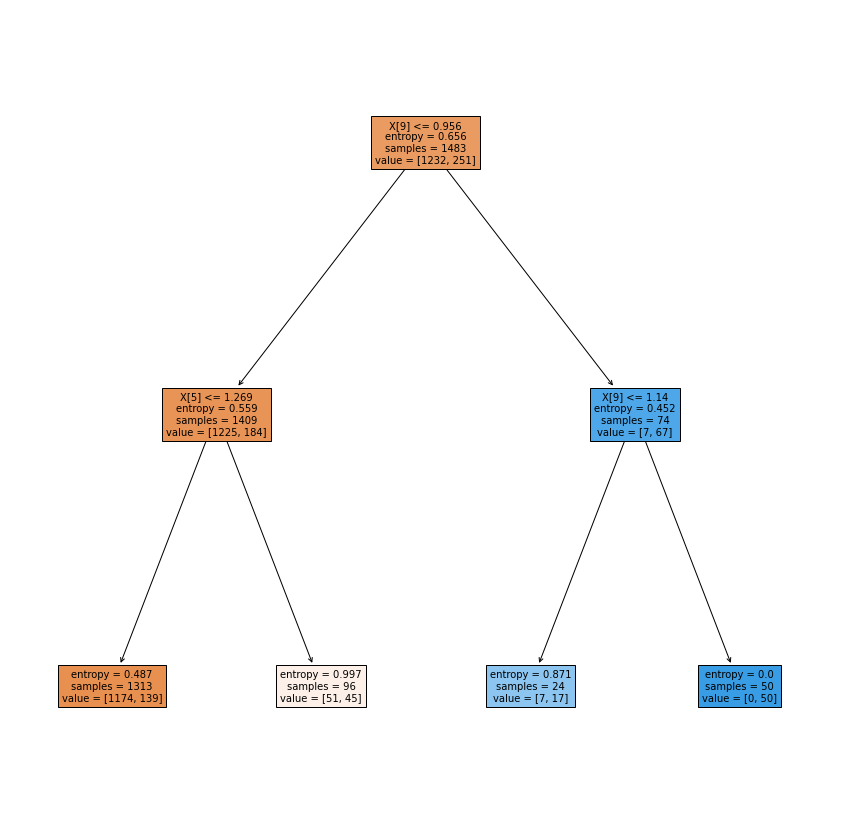

In [33]:
from sklearn.tree import plot_tree
# Graficamos el arbol de decisión
plt.figure(figsize = (15, 15))
plot_tree(clf,filled=True, fontsize = 10)
plt.show()

In [34]:
#En las poximas celdas se hace una descripción del árbol de decisión presentado anteriormente
n_nodes = clf.tree_.node_count
children_left = clf.tree_.children_left
children_right = clf.tree_.children_right
feature = clf.tree_.feature
threshold = clf.tree_.threshold

In [35]:
node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, 0)]  # start with the root node id (0) and its depth (0)
while len(stack) > 0:
    # `pop` ensures each node is only visited once
    node_id, depth = stack.pop()
    node_depth[node_id] = depth

    # If the left and right child of a node is not the same we have a split
    # node
    is_split_node = children_left[node_id] != children_right[node_id]
    # If a split node, append left and right children and depth to `stack`
    # so we can loop through them
    if is_split_node:
        stack.append((children_left[node_id], depth + 1))
        stack.append((children_right[node_id], depth + 1))
    else:
        is_leaves[node_id] = True

print(
    "The binary tree structure has {n} nodes and has "
    "the following tree structure:\n".format(n=n_nodes)
)
for i in range(n_nodes):
    if is_leaves[i]:
        print(
            "{space}node={node} is a leaf node.".format(
                space=node_depth[i] * "\t", node=i
            )
        )
    else:
        print(
            "{space}node={node} is a split node: "
            "go to node {left} if X[:, {feature}] <= {threshold} "
            "else to node {right}.".format(
                space=node_depth[i] * "\t",
                node=i,
                left=children_left[i],
                feature=feature[i],
                threshold=threshold[i],
                right=children_right[i],
            )
        )

The binary tree structure has 7 nodes and has the following tree structure:

node=0 is a split node: go to node 1 if X[:, 9] <= 0.9560292363166809 else to node 4.
	node=1 is a split node: go to node 2 if X[:, 5] <= 1.2692206799983978 else to node 3.
		node=2 is a leaf node.
		node=3 is a leaf node.
	node=4 is a split node: go to node 5 if X[:, 9] <= 1.1398036479949951 else to node 6.
		node=5 is a leaf node.
		node=6 is a leaf node.


In [36]:
#El modelo acierta el 87% de las veces sobre el conjunto de entrenamiento y un 86% sobre el de testeo.
from sklearn.metrics import accuracy_score
train_acc = accuracy_score(y_train, y_train_pred) 
test_acc = accuracy_score(y_test, y_test_pred)
print(f'Train accuracy: {train_acc:0.2}')
print(f'Test accuracy: {test_acc:0.2}')

Train accuracy: 0.87
Test accuracy: 0.86


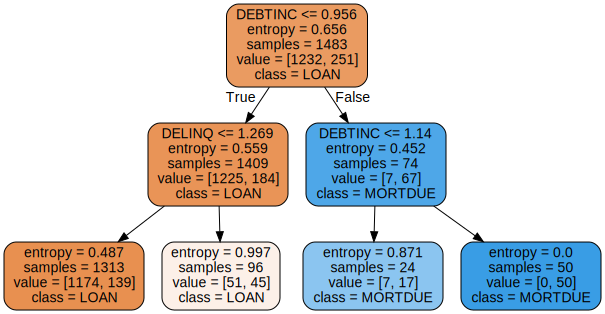

In [37]:
#Graficamos el árbol con las etiquetas para ver las variables que utiliza para clasificar cuando un cliente es moroso o no. 
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None, 
  feature_names=['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE',
       'NINQ', 'CLNO', 'DEBTINC'],  
  class_names=['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE',
       'NINQ', 'CLNO', 'DEBTINC'],  
  filled=True, rounded=True
  )

graph = graphviz.Source(dot_data)
graph

##Evaluación con métricas del conjunto de Entrenamiento

**Reporte de Clasificacion**

In [38]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.87      0.99      0.93      1232
           1       0.91      0.27      0.41       251

    accuracy                           0.87      1483
   macro avg       0.89      0.63      0.67      1483
weighted avg       0.88      0.87      0.84      1483



***Matriz de confusión para el conjunto de entrenamiento**

In [39]:
cm2=confusion_matrix(y_train, y_train_pred)
cm2

array([[1225,    7],
       [ 184,   67]])

##Evaluación con métricas del conjunto de Evaluacion



**Reporte de Clasificacion**

In [40]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92       313
           1       0.61      0.34      0.44        58

    accuracy                           0.86       371
   macro avg       0.75      0.65      0.68       371
weighted avg       0.84      0.86      0.85       371



**Matriz de confusion para el conjunto de Evaluacion**

In [41]:
cm3=confusion_matrix(y_test, y_test_pred)
cm3

array([[300,  13],
       [ 38,  20]])

##Graficos de Matriz de Confusion para el conjunto de Entrenamiento y Evaluacion

[Text(30.5, 0.5, 'Predicted Label'), Text(0.5, 21.5, 'True Label')]

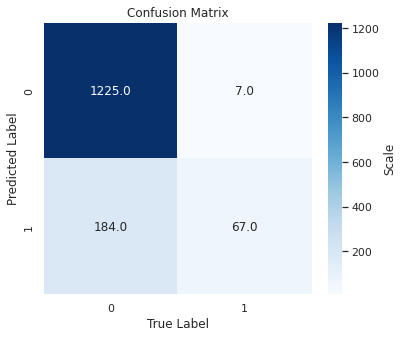

In [42]:
# Conjunto de Entrenamiento
sns.set(color_codes=True)
plt.figure(1, figsize=(6, 5))

plt.title("Confusion Matrix" )
# define labels
labels = ["0", "1"] 
sns.set(font_scale=1)
ax = sns.heatmap(cm2, annot=True, fmt='.1f', cmap="Blues", cbar_kws={'label': 'Scale'})
 
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
 
ax.set(ylabel="Predicted Label", xlabel="True Label")

[Text(30.5, 0.5, 'Predicted Label'), Text(0.5, 21.5, 'True Label')]

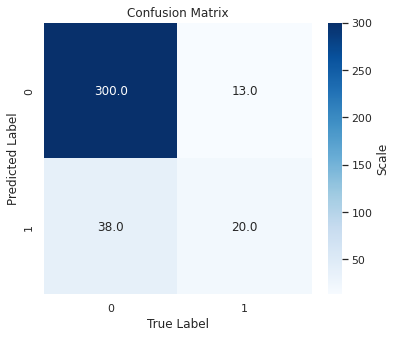

In [43]:
# Conjunto de Evaluacion
sns.set(color_codes=True)
plt.figure(1, figsize=(6, 5))

plt.title("Confusion Matrix" )
# define labels
labels = ["0", "1"] 
sns.set(font_scale=1)
ax = sns.heatmap(cm3, annot=True, fmt='.1f', cmap="Blues", cbar_kws={'label': 'Scale'})
 
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
 
ax.set(ylabel="Predicted Label", xlabel="True Label")

### Ejercicio 3.2: Ajuste de Hiperparámetros

Seleccionar valores para los hiperparámetros principales del DecisionTreeClassifier. Como mínimo, probar diferentes criterios de partición (criterion), profundidad máxima del árbol (max_depth), y cantidad mínima de samples por hoja (min_samples_leaf).

Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

Reportar accuracy promedio y varianza para todas las configuraciones.

Para la mejor configuración encontrada, evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión


Documentación:
- https://scikit-learn.org/stable/modules/grid_search.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

#### 1) Seleccionar valores para los hiperparámetros principales del DecisionTreeClassifier. Como mínimo, probar diferentes criterios de partición (criterion), profundidad máxima del árbol (max_depth), y cantidad mínima de samples por hoja (min_samples_leaf).Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

In [44]:
#from sklearn.tree import DecisionTreeClassifier

In [45]:
#armamos el diccionario de parametros, elegimos gini y entropía para evaluar el costo, hasta 4 ramas 
param_tree_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 5, 7, 10, 15],
    'min_samples_leaf': [1, 5, 10]
}

In [46]:
#listamos los posibles modelos

for params_tree in ParameterGrid(param_tree_grid):
    print(params_tree)
    model = DecisionTreeClassifier(**params_tree, random_state=0)


{'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1}
{'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 5}
{'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 10}
{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1}
{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 5}
{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 10}
{'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 1}
{'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 5}
{'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 10}
{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1}
{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 5}
{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 10}
{'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 1}
{'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 5}
{'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 10}
{'criterion': 'entropy', 'max_depth': 1, 'min_samples_leaf': 1}
{'criterio

In [47]:
# usamos GRIND SEARCH con 5 fold cross validation que esta establecido por default en GridSearchCV
# entrenamos

model = DecisionTreeClassifier(random_state=0)

cv2= GridSearchCV(model, param_tree_grid, scoring='accuracy', cv=5)
cv2.fit(X_train, y_train);

In [48]:
#obtenemos los resultados posibles e imprimimos el reporting del ranking 
results = cv2.cv_results_
params = results['params']
mean = results['mean_test_score']
std = results['std_test_score']
rank = results['rank_test_score']

print("crit.\tdepth\tmin_samples_leaf\t| mean\tstd\trank")
for p, m, s, r in zip(params, mean, std, rank):
      print(f"{p['criterion']}\t{p['max_depth']}\t{p['min_samples_leaf']}\t                | {m:0.2f}\t{s:0.2f}\t{r}")

crit.	depth	min_samples_leaf	| mean	std	rank
gini	1	1	                | 0.87	0.01	16
gini	1	5	                | 0.87	0.01	16
gini	1	10	                | 0.87	0.01	16
gini	5	1	                | 0.87	0.01	11
gini	5	5	                | 0.87	0.01	12
gini	5	10	                | 0.88	0.01	8
gini	7	1	                | 0.88	0.02	5
gini	7	5	                | 0.87	0.02	14
gini	7	10	                | 0.88	0.01	1
gini	10	1	                | 0.88	0.02	6
gini	10	5	                | 0.88	0.02	2
gini	10	10	                | 0.88	0.01	10
gini	15	1	                | 0.87	0.02	25
gini	15	5	                | 0.87	0.02	23
gini	15	10	                | 0.88	0.01	7
entropy	1	1	                | 0.87	0.01	16
entropy	1	5	                | 0.87	0.01	16
entropy	1	10	                | 0.87	0.01	16
entropy	5	1	                | 0.88	0.01	9
entropy	5	5	                | 0.87	0.01	13
entropy	5	10	                | 0.88	0.00	3
entropy	7	1	                | 0.87	0.01	15
entropy	7	5	                | 0.87	0.01	25
entrop

In [49]:
# mejores parametros 
best_model_ok = cv2.best_estimator_
cv2.best_params_

{'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 10}

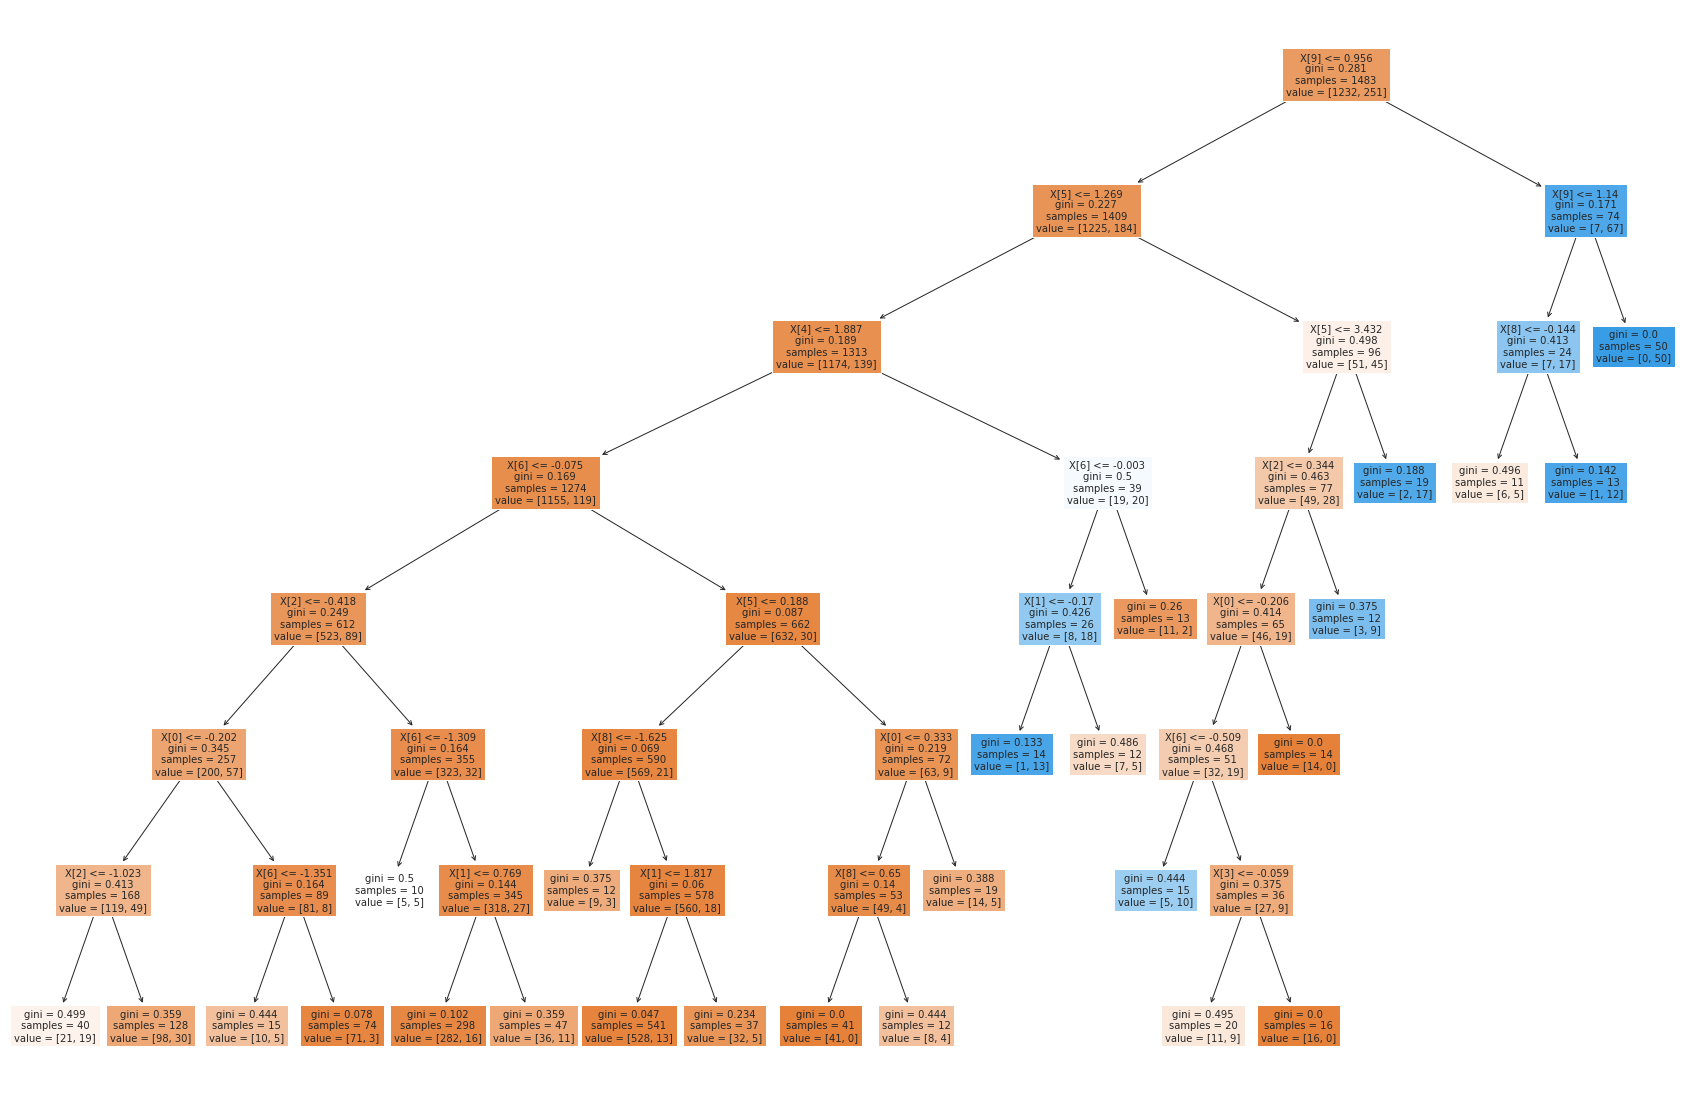

In [50]:
plt.figure(figsize = (30,20))
plot_tree(best_model_ok, filled=True, fontsize = 10);

#### 2) Para la mejor configuración encontrada, evaluar sobre el conjunto de entrenamiento y sobre el conjunto de evaluación, reportando:

. Accuracy

. Precision

. Recall

. F1

. matriz de confusión

 ## a) Métricas: sobre conjunto de entrenamiento:

In [51]:
#paso 1: predecir y evaluar con el mejor modelo best_model_ok
y_train_pred_2 = best_model_ok.predict(X_train)


In [52]:
#Acurancy
# para el dataset de entrenamiento el modelo predice correctamente el  90% de los casos.
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

train_acc = accuracy_score(y_train, y_train_pred_2)
print(f'Train accuracy: {train_acc:0.2}')


Train accuracy: 0.9


In [53]:
precision_score(y_train,  y_train_pred_2, average= None)

array([0.89705882, 0.90243902])

In [54]:
#recall
# las predicciones correcta sobre incumplimiento de pagos sobre el total de casos observados es del 42%
recall_score(y_train, y_train_pred_2, average= None)

array([0.99025974, 0.44223108])

In [55]:
#F1
f1_score(y_train, y_train_pred_2,  average= None)

array([0.94135802, 0.59358289])

In [56]:
#Matriz de confución 
mc_train=confusion_matrix(y_train, y_train_pred_2)
mc_train

array([[1220,   12],
       [ 140,  111]])

[Text(30.5, 0.5, 'Predicted Label'), Text(0.5, 21.5, 'True Label')]

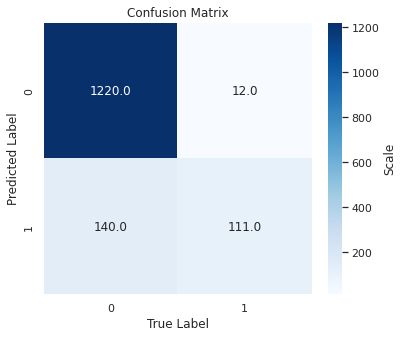

In [57]:

sns.set(color_codes=True)
plt.figure(1, figsize=(6, 5))

plt.title("Confusion Matrix" )

labels = ["0", "1"] 
sns.set(font_scale=1)
ax = sns.heatmap(mc_train, annot=True, fmt='.1f', cmap="Blues", cbar_kws={'label': 'Scale'})
 
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
 
ax.set(ylabel="Predicted Label", xlabel="True Label")

 #### b) Métricas: sobre conjunto de testeo:

In [58]:
#paso 1: predecir y evaluar con el mejor modelo best_model_ok
y_test_pred_2 = best_model_ok.predict(X_test)


In [59]:
#Acurancy
# para el dataset de entrenamiento el modelo predice correctamente el  90% de los casos.
from sklearn.metrics import accuracy_score

test_acc = accuracy_score(y_test, y_test_pred_2)
print(f'Train accuracy: {train_acc:0.2}')


Train accuracy: 0.9


In [60]:
precision_score(y_test,  y_test_pred_2, average= None)

array([0.9039039 , 0.68421053])

In [61]:
#recall
# las predicciones correcta sobre incumplimiento de pagos sobre el total de casos observados es del 46%
recall_score(y_test, y_test_pred_2, average= None)

array([0.96166134, 0.44827586])

In [62]:
#F1
f1_score(y_test, y_test_pred_2, average= None)

array([0.93188854, 0.54166667])

In [63]:
#Matriz de confución 
mc_test=confusion_matrix(y_test, y_test_pred_2)
mc_test

array([[301,  12],
       [ 32,  26]])

[Text(30.5, 0.5, 'Predicted Label'), Text(0.5, 21.5, 'True Label')]

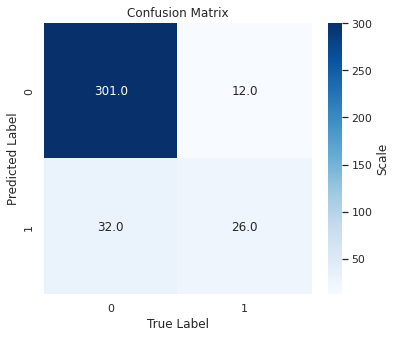

In [64]:

sns.set(color_codes=True)
plt.figure(1, figsize=(6, 5))

plt.title("Confusion Matrix" )

labels = ["0", "1"] 
sns.set(font_scale=1)
ax = sns.heatmap(mc_test, annot=True, fmt='.1f', cmap="Blues", cbar_kws={'label': 'Scale'})
 
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
 
ax.set(ylabel="Predicted Label", xlabel="True Label")

In [65]:
print(classification_report(y_train, y_train_pred_2))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      1232
           1       0.90      0.44      0.59       251

    accuracy                           0.90      1483
   macro avg       0.90      0.72      0.77      1483
weighted avg       0.90      0.90      0.88      1483



In [66]:
print(classification_report(y_test, y_test_pred_2))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       313
           1       0.68      0.45      0.54        58

    accuracy                           0.88       371
   macro avg       0.79      0.70      0.74       371
weighted avg       0.87      0.88      0.87       371



In [67]:
dataset["TARGET"].value_counts()

0    1545
1     309
Name: TARGET, dtype: int64

#Conclusiones:
a) El objetivo del trabajo es encontrar un modelo capaz de predecir el cumplimiento o incumplimiento de clientes potenciales de una entidad bancaria. El banco, con solo aplicar información histórica al modelo, podría tener una predicción que evite otorgar préstamos a futuros clientes inclumplidores.

b) Para ello se propuso trabajar sobre un dataset que al analizarlo, vemos como primera limitación un desbalanceo importante en cuanto a clientes cumplidores (1545 casos) y clientes incumplidores (309 casos). Lo que puede ser una limitante al momento de querer obtener un modelo que permita predecir con alguna certeza aceptable casos de clientes incumplidores

c) Se propuso analizar diferentes hiperparametros de función de costo, cantidad de rama del arbol, número mínimo de casos por hoja para permitir su ruptura, y cantidad de folder. el modelo obtimo según los hiperparametros elegidos es:
{'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 10}


d) Se aplicó el modelo sobre los datos de entrenamiento y test, obteniendo los siguientes resultados: 
 

1.   Para los casos de clientes cumplidores (Target=0) el modelo muestra buena performance de previsibilidad de los casos disponibles: 
 - el 90% de las prediciones fueron correctas, tanto en los casos de entrenamiento  como de test (Presicion). 
 - Entre el 96% (Test) y 99 % (train) de los casos en donde los clientes son cumplidores, el modelo los predijo correctamente (Recall). 
Para el caso de clientes incumplidores  es modelo muestra poca fiabilidad, posiblemnete por la poca cantidad de casos de impago.
2. En cuanto a la catidad de casos previstos correctamente, tanto en train como en test el modelo no fueron tan exacto:
 - Aunque la precisión de la predicciones fué corecta en un 90%...
 - En cuanto a RECALL, (casos correctos predichos) el modelo no se comporta tan eficientemente, solo el 44%/45% de los casos de clientes incumplidores fueron estimados correctamente. O sea, en  más de la mitad de los casos, el modelo predijo que un cliente podía ser cumplidor cuando en realidad era incumplidor. 

Este tipo de error "tipo 1", hace que el modelo no sea del todo confiable para predecir clientes incumplidores por lo que recomendamos ampliar la muestra y volver de forma tal de poder balancear mejor los casos de cumplidores/incumplidores.

